# K-means

### Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

### Read CSV File

In [2]:
# Read CSV file
df = pd.read_csv("DIT_AP_Traffic_Class.csv")

# Make a copy of data frame
df1 = df.copy()

# Print data frame
df1

,ap_traffic_class_id,ap_traffic_id,bssid_id,ap_whitelist_id,monitor_radio_id,posted_data_id,aci,aci_desc,aif,cw_min,...,bw_load,bw_access,bw_free,bw_fail,contention,aef,capacity_available_normalized,capacity_available_mbps,capacity_utilization,created_at
0,67446031,177957317,74167,667,1126,43469151,0,BE,3,4,...,0.0006,0.0001,0.9015,NaN,1.0000,0.8457,0.7631,0.459,0.0008,2018-05-02 00:01:57
1,67446032,177957317,74167,667,1126,43469151,3,VO,1,2,...,0.0213,0.0006,0.9010,NaN,1.0194,0.9717,0.8968,0.000,0.0237,2018-05-02 00:01:57
2,67446033,177957320,74184,670,1126,43469151,3,VO,1,2,...,0.0003,0.0001,0.9016,NaN,1.0000,0.8240,0.7433,0.000,0.0004,2018-05-02 00:01:57
3,67446034,177957321,74186,670,1126,43469151,3,VO,1,2,...,0.0002,0.0000,0.9016,NaN,1.2381,0.8278,0.7466,0.000,0.0003,2018-05-02 00:01:57
4,67446035,177957327,74173,669,1126,43469151,3,VO,1,2,...,0.0002,0.0001,0.9016,NaN,1.0000,0.7343,0.6622,0.000,0.0002,2018-05-02 00:01:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472382,68475955,182119668,74271,665,1137,45594370,0,BE,3,4,...,0.0062,0.0107,0.8287,NaN,1.0730,0.3680,0.3111,2.239,0.0199,2018-05-30 11:15:36
472383,68475956,182119668,74271,665,1137,45594370,3,VO,1,2,...,0.0007,0.0005,0.8389,NaN,1.0558,0.5945,0.4994,0.000,0.0014,2018-05-30 11:15:36
472384,68475957,182119669,74273,671,1137,45594370,0,BE,3,4,...,0.0045,0.0034,0.8360,NaN,1.0582,0.5699,0.4809,1.292,0.0093,2018-05-30 11:15:36
472385,68475958,182119669,74273,671,1137,45594370,3,VO,1,2,...,0.0020,0.0001,0.8393,NaN,1.1481,0.9732,0.8188,0.000,0.0024,2018-05-30 11:15:36


### Drop NaN columns
* "how" --> Determine if row or column is removed from DataFrame, when we have at least one NA or all NA:
    * ‘any’ : If any NA values are present, drop that row or column.
    * ‘all’ : If all values are NA, drop that row or column.

In [3]:
# Drop columns with NaN data
df1.dropna(axis=1, how='all', inplace= True)

# Print data Frame
df1

,ap_traffic_class_id,ap_traffic_id,bssid_id,ap_whitelist_id,monitor_radio_id,posted_data_id,aci,aci_desc,aif,cw_min,...,fer,bw_load,bw_access,bw_free,contention,aef,capacity_available_normalized,capacity_available_mbps,capacity_utilization,created_at
0,67446031,177957317,74167,667,1126,43469151,0,BE,3,4,...,0.0000,0.0006,0.0001,0.9015,1.0000,0.8457,0.7631,0.459,0.0008,2018-05-02 00:01:57
1,67446032,177957317,74167,667,1126,43469151,3,VO,1,2,...,0.0000,0.0213,0.0006,0.9010,1.0194,0.9717,0.8968,0.000,0.0237,2018-05-02 00:01:57
2,67446033,177957320,74184,670,1126,43469151,3,VO,1,2,...,0.0000,0.0003,0.0001,0.9016,1.0000,0.8240,0.7433,0.000,0.0004,2018-05-02 00:01:57
3,67446034,177957321,74186,670,1126,43469151,3,VO,1,2,...,0.0000,0.0002,0.0000,0.9016,1.2381,0.8278,0.7466,0.000,0.0003,2018-05-02 00:01:57
4,67446035,177957327,74173,669,1126,43469151,3,VO,1,2,...,0.0000,0.0002,0.0001,0.9016,1.0000,0.7343,0.6622,0.000,0.0002,2018-05-02 00:01:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472382,68475955,182119668,74271,665,1137,45594370,0,BE,3,4,...,0.6322,0.0062,0.0107,0.8287,1.0730,0.3680,0.3111,2.239,0.0199,2018-05-30 11:15:36
472383,68475956,182119668,74271,665,1137,45594370,3,VO,1,2,...,0.0000,0.0007,0.0005,0.8389,1.0558,0.5945,0.4994,0.000,0.0014,2018-05-30 11:15:36
472384,68475957,182119669,74273,671,1137,45594370,0,BE,3,4,...,0.0000,0.0045,0.0034,0.8360,1.0582,0.5699,0.4809,1.292,0.0093,2018-05-30 11:15:36
472385,68475958,182119669,74273,671,1137,45594370,3,VO,1,2,...,0.0000,0.0020,0.0001,0.8393,1.1481,0.9732,0.8188,0.000,0.0024,2018-05-30 11:15:36


### Drop unnecesary data columns
* Warning! I have delete 'bw_fail' column before (drop NaN columns), so I don´t have to include it in the columns to delete now.
* .drop():

    * labels--> name of the data we want to delete
    * axis = 0 --> if they data we want to delete are in rows ||  axis = 1 --> if they're in columns
    * inplace = true --> Alter the original DataFrame || inplace = False --> return a result

In [4]:
# Drop unnecessary data
df1.drop(labels=['ap_traffic_class_id','ap_traffic_id','ap_whitelist_id','monitor_radio_id','posted_data_id','aci','aci_desc','aif',
'cw_min','cw_max','txop','frames_tx_1st','frames_tx_total','throughput','fer','bw_access','bw_free','contention','aef',
'capacity_available_normalized','capacity_available_mbps','capacity_utilization'], axis='columns', inplace=True)

# Print data frame
df1

,bssid_id,bw_load,created_at
0,74167,0.0006,2018-05-02 00:01:57
1,74167,0.0213,2018-05-02 00:01:57
2,74184,0.0003,2018-05-02 00:01:57
3,74186,0.0002,2018-05-02 00:01:57
4,74173,0.0002,2018-05-02 00:01:58
...,...,...,...
472382,74271,0.0062,2018-05-30 11:15:36
472383,74271,0.0007,2018-05-30 11:15:36
472384,74273,0.0045,2018-05-30 11:15:36
472385,74273,0.0020,2018-05-30 11:15:36


### Choose data from only 2 different days
* For example: 2018-05-10 && 2018-05-26

In [5]:
# Filter data
df1 = df1[((df1['created_at'] >= '2018-05-10 00:00:00') & (df1['created_at'] <= '2018-05-10 23:59:59')) |
((df1['created_at'] >= '2018-05-26 00:00:00') & (df1['created_at'] <= '2018-05-26 23:59:59'))]

# Print data frame
df1

,bssid_id,bw_load,created_at
10257,74184,0.0002,2018-05-10 00:00:10
10258,74173,0.0000,2018-05-10 00:00:10
10259,74173,0.0000,2018-05-10 00:00:10
10260,74186,0.0003,2018-05-10 00:00:10
10261,74171,0.0000,2018-05-10 00:00:11
...,...,...,...
353069,76825,0.0017,2018-05-26 23:59:51
353070,76827,0.0009,2018-05-26 23:59:51
353071,76827,0.0003,2018-05-26 23:59:51
353072,74283,0.0001,2018-05-26 23:59:55


### Choose data from 3 different clients
* For example: 74171 , 76825 & 74285

In [6]:
# Filter data
df1 = df1[(df1['bssid_id'] == 74171) | (df1['bssid_id'] == 76825) | (df1['bssid_id'] == 74285)]

# Print data frame
df1

,bssid_id,bw_load,created_at
10261,74171,0.0000,2018-05-10 00:00:11
10264,74171,0.0001,2018-05-10 00:04:33
10267,74171,0.0001,2018-05-10 00:05:21
10303,74171,0.0001,2018-05-10 00:51:37
10313,74171,0.0001,2018-05-10 01:15:20
...,...,...,...
353003,74171,0.0001,2018-05-26 23:55:31
353026,74171,0.0002,2018-05-26 23:57:35
353036,74285,0.0000,2018-05-26 23:57:50
353069,76825,0.0017,2018-05-26 23:59:51


### Show plots of DataFrame (Scatter)

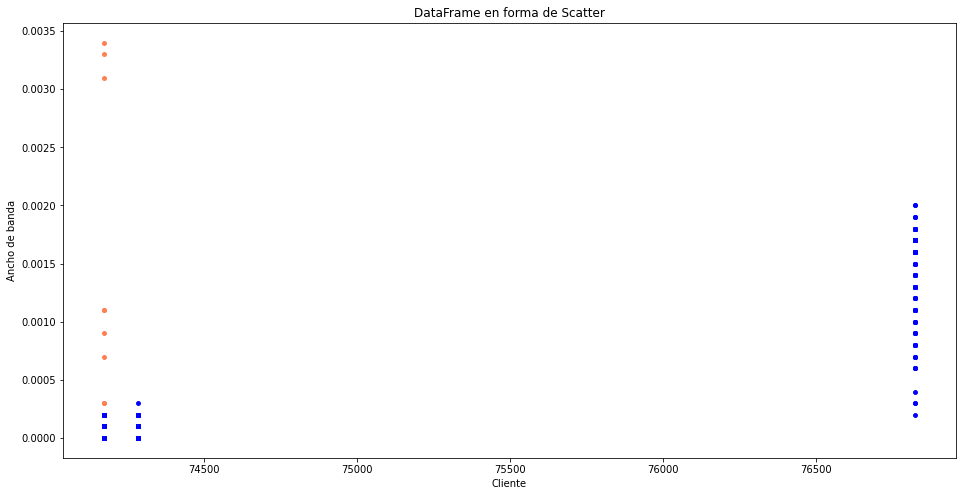

In [7]:
# Separate DF in days
df_dayOne = df1[((df1['created_at'] > '2018-05-10 00:00:00') & (df1['created_at'] <= '2018-05-10 23:59:59'))]
df_dayTwo = df1[((df1['created_at'] > '2018-05-26 00:00:00') & (df1['created_at'] <= '2018-05-26 23:59:59'))]

# Figure size
plt.figure(figsize=(16,8))

# Day 1
plt.scatter(df_dayOne["bssid_id"], df_dayOne["bw_load"], s = 60, c = "coral", marker='.')
plt.title("DataFrame en forma de Scatter")
plt.xlabel("Ancho de banda")
plt.ylabel("Cliente")

# Day 2
plt.scatter(df_dayTwo["bssid_id"], df_dayTwo["bw_load"],s = 60, c = "blue", marker='.')
plt.xlabel("Cliente")
plt.ylabel("Ancho de banda")

# Print plot
plt.show()

### Elbow method
* To determine the number of clusters (k) the algorithm must use
* The algorithm is run over the DF serveral times using different values for k
* For each iteration the sum of the squared distances of each datapoint to the nearest cluster center is calculated

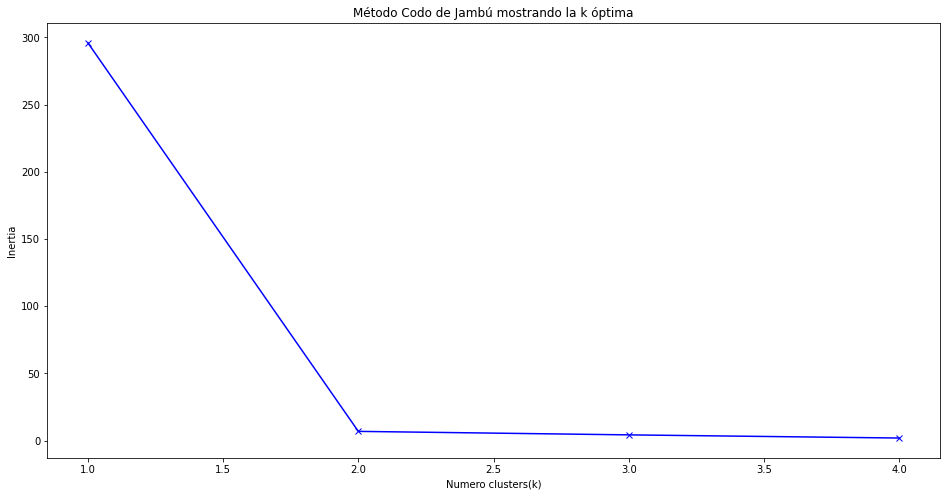

In [8]:
# Save TimeStamp
dates = df1["created_at"]

# Drop Date from dfCopy
df1 = df1.drop(labels=["created_at"], axis=1)

# Normalize data
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
df1_escalado = min_max_scaler.fit_transform(df1)
df1_escalado = pd.DataFrame(df1_escalado)
df1_escalado = df1_escalado.rename(columns={0: 'bssid_id', 1: 'bw_load'})

# Elbow method
inertia = [] 
rango = range(1,5)
for i in rango:
    algoritmo = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo.fit(df1_escalado)
    inertia.append(algoritmo.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-')
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('Método Codo de Jambú mostrando la k óptima')

# Print plot
plt.show()

### k-means from sklearn
* With the Elbow method we obtain the optimal k is 2

In [9]:
# Number of clusters
k = 2

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster = kmeans.fit_predict(df1_escalado)

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Add Date column
df1.insert(0, 'created_at', dates)

# Print data frame
df1

,created_at,bssid_id,bw_load
10261,2018-05-10 00:00:11,74171,0.0000
10264,2018-05-10 00:04:33,74171,0.0001
10267,2018-05-10 00:05:21,74171,0.0001
10303,2018-05-10 00:51:37,74171,0.0001
10313,2018-05-10 01:15:20,74171,0.0001
...,...,...,...
353003,2018-05-26 23:55:31,74171,0.0001
353026,2018-05-26 23:57:35,74171,0.0002
353036,2018-05-26 23:57:50,74285,0.0000
353069,2018-05-26 23:59:51,76825,0.0017


### Graphic representation of k-means clusters

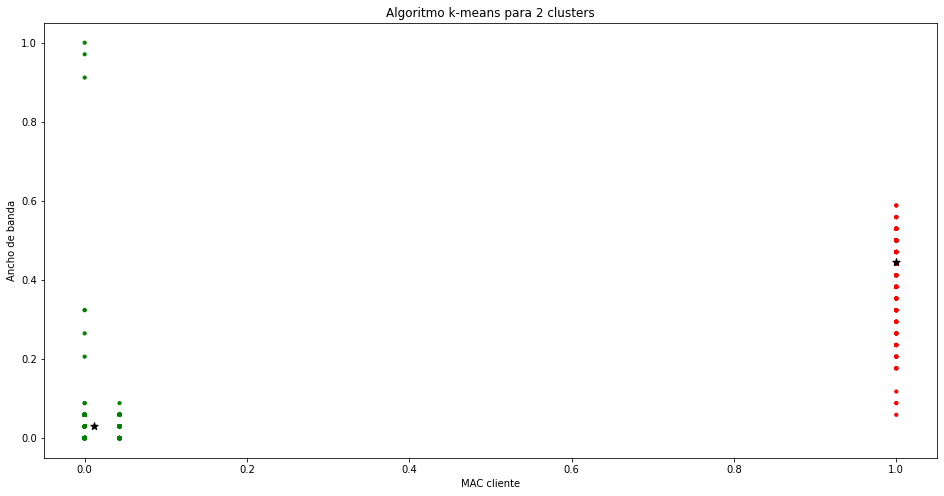

In [10]:
# Asign colors to clusters
colors = ['red', 'green'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Asign x and y
x = df1_escalado['bssid_id'].values
y = df1_escalado['bw_load'].values

# Plot
plt.figure(figsize=(16,8))
plt.scatter(x, y,marker='.', c=asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)
plt.xlabel('MAC cliente')
plt.ylabel('Ancho de banda')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Print plot
plt.show()